In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) #一维转二维
y = x.pow(2) + 0.2*torch.rand(x.size()) #加入噪点影响

In [46]:
def save():
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()
    
    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # plot result
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
    # 2 ways to save the net
    torch.save(net1, 'net.pkl') # save entire net保存全部网络结构
    torch.save(net1.state_dict(), 'net_params.pkl') # save only the parameters只保留参数

In [47]:
def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)
    
    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

In [52]:
def restore_params():
    # restore only the parameters in the net1 to net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    
    # copy net1's parameters into net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)
    
    # plot result
    plt.figure(1, figsize=(10, 3))
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

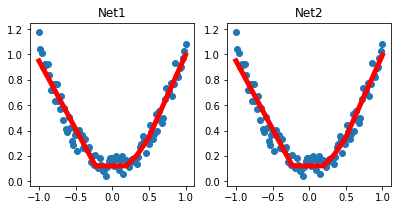

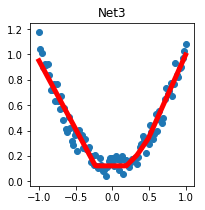

In [72]:
# save net1
save()
# restore entire net (may slow)
restore_net()
# restore only the net parameters
restore_params()